 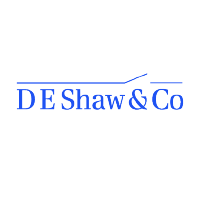                                                             
 
 
 ## Note:
 #### 1.please rerun the file if you face any error during execution
 #### 2. please open the file through jupyternotebook or google colab for better viewing

# Case Study - People Analytics - Data Science & Reporting Role

### Run below tab to install all the libraries and dependencies required for this case study

In [1]:
## please run this tab before proceeding to the next step
#Installing all the libraries required for this Case Study
!pip install numpy pandas dash plotly matplotlib seaborn scipy missingno

### Importing all the required Libraries

In [2]:
## importing all required libraries
import os
import numpy as np
import pandas as pd
import dash
from dash import dcc
from dash import html
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import chi2_contingency
import missingno as msno
from datetime import datetime
%matplotlib inline

In [3]:
# getting current working directory
os.getcwd()

'C:\\Users\\19412'

In [4]:
#Check the file where it is located.
os.listdir(os.getcwd())

['.dotnet',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.templateengine',
 'anaconda3',
 'AppData',
 'Application Data',
 'application_sources_effectiveness.pdf',
 'Case_Study_DE_SHAW_CO_GROUP.ipynb',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.0.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.1.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.2.regtrans-ms',
 'NTUSER.DAT{a2332f17-cdbf-11ec-8680-002248483d79}.TxR.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictu

## Loading all the Required data files from Excel 

In [5]:
# Reading a Recruting Activity data file and skiping the first row and using second row as a header
# This dataset shows all the data related to the position applied and how far the candidate has reached in recruiting stage

recruiting_data= pd.read_excel(r"Downloads\Case_study_DE_Shaw_group\case_study.xlsx", sheet_name= 'Recruiting Activity Data',header=1, skiprows=[0])
recruiting_data.head()

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,Major,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,Computer Science,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,Political Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,Statistics,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,Physics,Bachelors,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Reading a offer response data file
# prints the top 5 rows of the data
# This dataset shows whether the candidate has accepted the offer decision or not.

offer_response_data= pd.read_excel(r"Downloads\Case_study_DE_Shaw_group\case_study.xlsx", sheet_name= 'Offer Response Data')
offer_response_data.head()

,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted


# Data Analysis
 
### performing the data analysis for each datasets like checking null values and finding outliers and removing unwanted columns and highlighting the data issues

### 1. Recruiting Data

In [7]:
#checking the shape of the data
# This shows we have 7408 rows and 20 columns
recruiting_data.shape

(7408, 20)

In [8]:
#checking all the null values in each column 
recruiting_data.isnull().sum()

Candidate ID Number                     0
Position Title                          0
Department                              0
Furthest Recruiting Stage Reached       0
Date of Application                     0
Application Source                      0
Years of Experience                     0
Candidate Type                          0
Degree                                  0
School                                  0
Major                                   0
Degree.1                             4247
School.1                             4247
Major.1                              4247
Degree.2                             6426
School.2                             6426
Major.2                              6426
Degree.3                             7390
School.3                             7390
Major.3                              7390
dtype: int64

<AxesSubplot:>

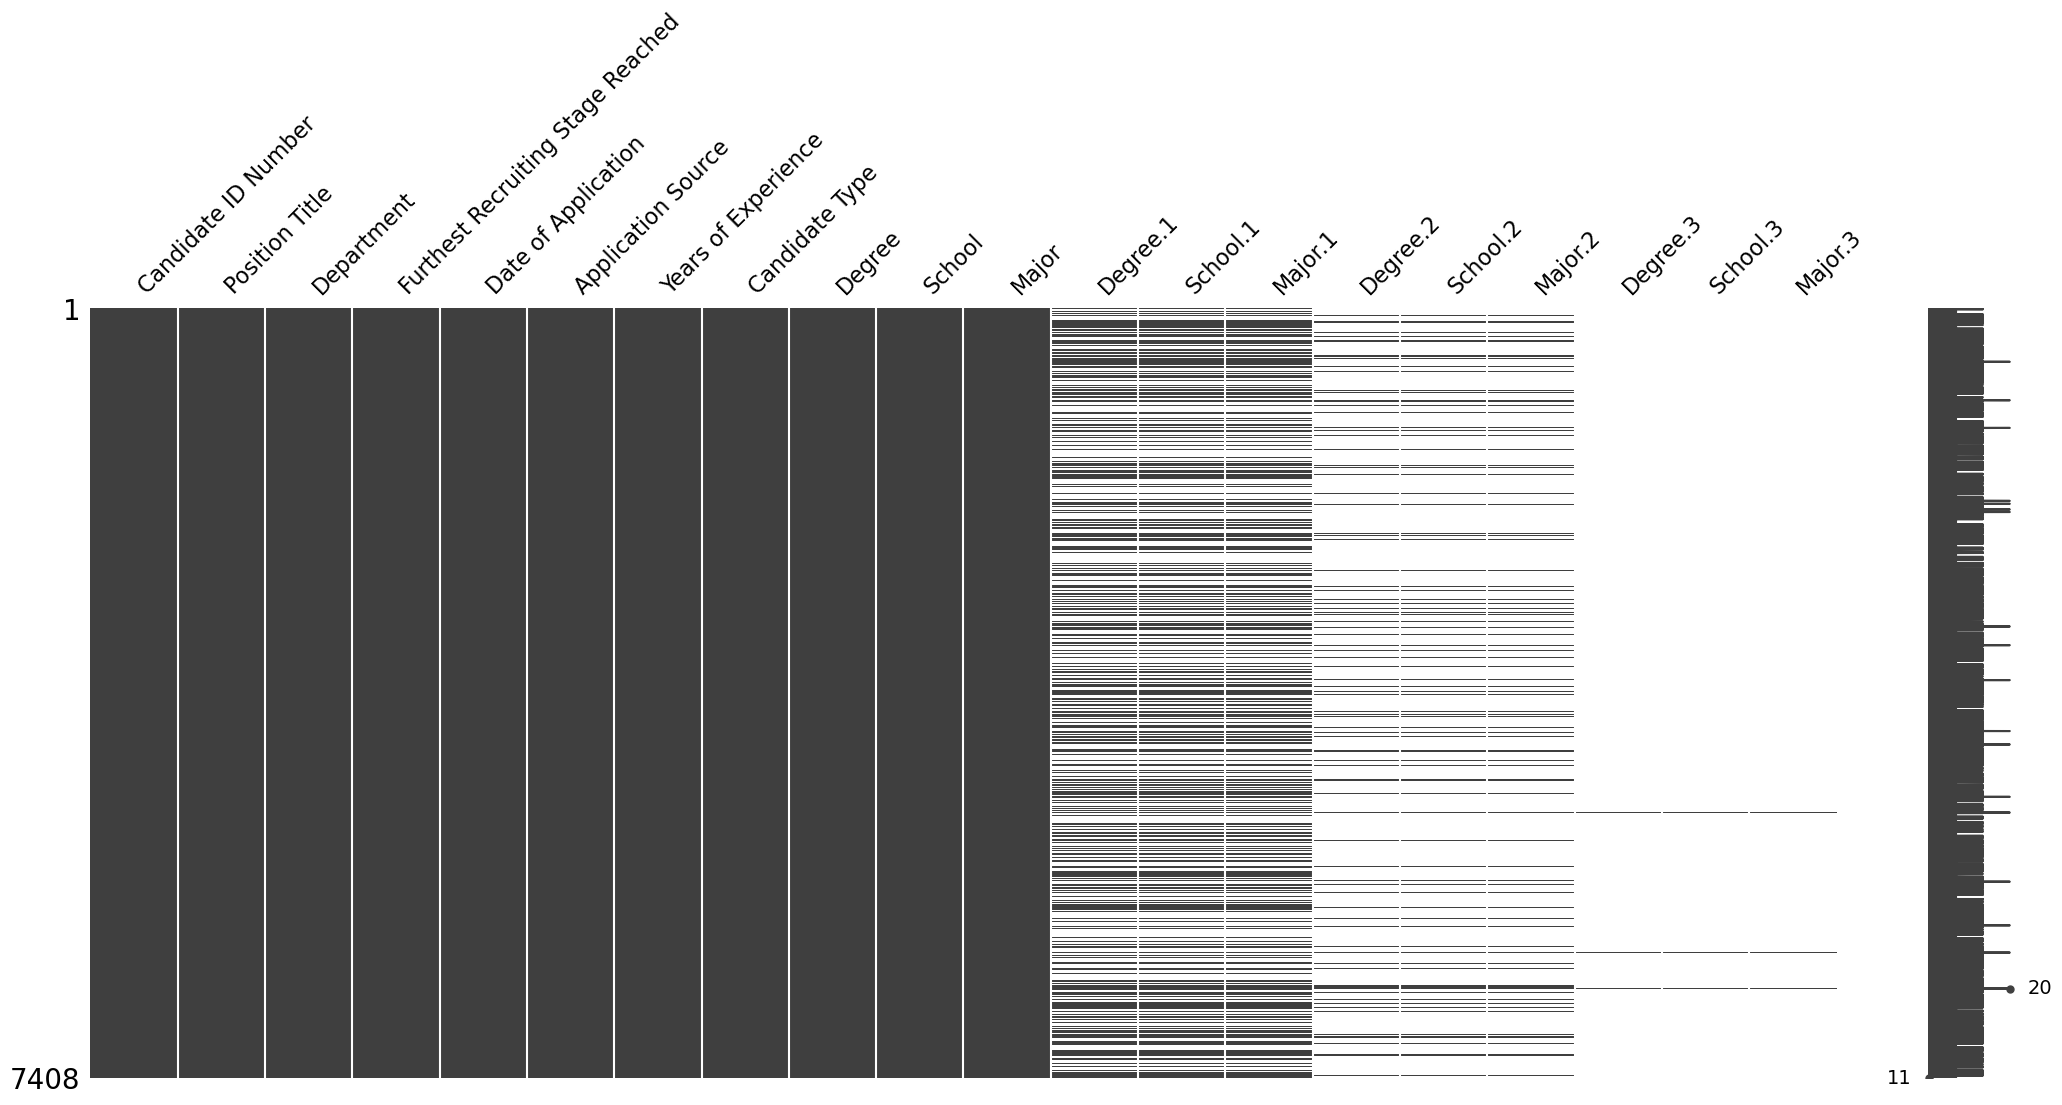

In [9]:
# using the missingingo plot to show the null values
msno.matrix(recruiting_data)

In [10]:
# Check the data types of each column in recruiting Data
recruiting_data.dtypes

Candidate ID Number                           int64
Position Title                               object
Department                                   object
Furthest Recruiting Stage Reached            object
Date of Application                  datetime64[ns]
Application Source                           object
Years of Experience                           int64
Candidate Type                               object
Degree                                       object
School                                       object
Major                                        object
Degree.1                                     object
School.1                                     object
Major.1                                      object
Degree.2                                     object
School.2                                     object
Major.2                                      object
Degree.3                                     object
School.3                                     object
Major.3     

In [11]:
## checking the values of recruiting_data
recruiting_data['Furthest Recruiting Stage Reached'].value_counts()

New Application       5639
Phone Screen           886
In-House Interview     719
Offer Sent             134
In-house Interview      30
Name: Furthest Recruiting Stage Reached, dtype: int64

In [12]:
# Checking for duplicates in recruiting_data frame
recruiting_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7403    False
7404    False
7405    False
7406    False
7407    False
Length: 7408, dtype: bool

## Finding whether we have an outlier in the Years of Experience column or not using Boxplot

<AxesSubplot:xlabel='Years of Experience'>

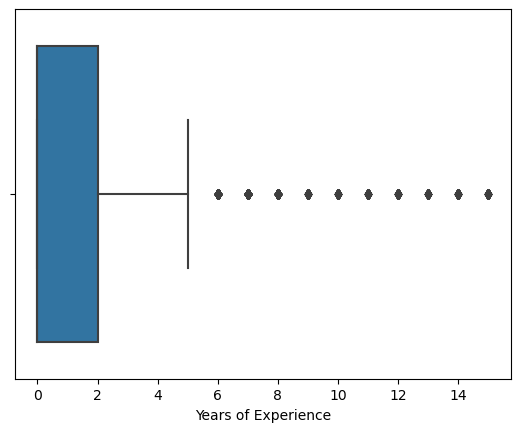

In [13]:
# checking the outlier for the years of Experience Column
sns.boxplot(x=recruiting_data['Years of Experience'])

### From the above graph we can see that there are no outliers in years of experience which means some of the candidates can have experience of above 14 years



## 2.Offer Response Data 

In [14]:
# Top 5 rows of offer_response_Data
offer_response_data.head()

,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted


In [15]:
## checking the shape of the data of offer response data
offer_response_data.shape

(134, 2)

In [16]:
# Check the data types of each column in offer reponse data
offer_response_data.dtypes

Candidate ID Number     int64
Offer Decision         object
dtype: object

In [17]:
#checking if any null values present in each column 
offer_response_data.isnull().sum()

Candidate ID Number    0
Offer Decision         0
dtype: int64

In [18]:
# Checking for duplicates
offer_response_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool

In [19]:
# Just Checking value counts of offer response data
offer_response_data['Offer Decision'].value_counts()

Offer Accepted            74
Offer Declined            48
Offer Response Pending    12
Name: Offer Decision, dtype: int64

### After Performing Data Cleaning I came into conclusion the data was clean

### Now combining two datasets

In [20]:
# combining two datasets using left join because to get all records from left and only matched records from right
combined_df = pd.merge(recruiting_data,offer_response_data, on='Candidate ID Number', how='left')

In [21]:
combined_df.head()

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Offer Decision
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,...,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,...,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,NaN
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,...,Bachelors,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Problem Statement: 1
### 1) Create a ""Recruiting Funnel"" view (as shown in the Legend tab) for each Department and Highest Degree combination. You will need to calculate the highest degree for each candidate using the education columns (the table in the Legend tab shows the order of degrees to consider from highest to lowest). The funnels should show the number of unique candidates who moved through each recruiting stage (including offer response). Count each candidate only once per Recruiting Funnel; if a candidate applied to multiple positions within a given department, count them once for the application that reached the furthest recruiting stage.

#### The output for these step will be all funnels in a PDF format as well as the Python script used to produce them."

In [22]:
# Taking required columns.
required_columns = ['Furthest Recruiting Stage Reached', 'Candidate ID Number', 'Offer Decision','Department', 'Date of Application', 'Application Source']
df = combined_df[required_columns]

In [23]:
# Show only Top 5 rows
df.head()

,Furthest Recruiting Stage Reached,Candidate ID Number,Offer Decision,Department,Date of Application,Application Source
0,New Application,3668741,NaN,Product,2016-11-17,Campus Event
1,New Application,783317,NaN,Operations,2017-12-22,Campus Job Board
2,New Application,2046362,NaN,Operations,2018-06-20,Agency
3,New Application,39321,NaN,Engineering,2018-09-04,Career Fair
4,New Application,222272,NaN,Operations,2018-11-08,Campus Job Board


In [24]:
## Manually written code to know how many of the applicants accepted the Job offer
offer_accepted = 0
offer_Declined = 0
offer_response_pending = 0
k = df['Furthest Recruiting Stage Reached']
l = df['Offer Decision']
for i in range(len(df['Furthest Recruiting Stage Reached'])):
    if df['Furthest Recruiting Stage Reached'][i] == 'Offer Sent':
        if df['Offer Decision'][i] == "Offer Accepted" :
            offer_accepted+=1
        elif df['Offer Decision'][i] == 'Offer Declined':
            offer_Declined += 1
        elif df['Offer Decision'][i] == 'Offer Response Pending':
            offer_response_pending+=1
## Creating a new Dataframe with applicants accepeted offer.
Accepted_df = pd.DataFrame({'Stage': ['Offer Accepted'],'Applicants': [offer_accepted]})

In [25]:
## Replace value of "In-house Interview" with "In-House Interview"
df.loc[df['Furthest Recruiting Stage Reached'] == 'In-house Interview', 'Furthest Recruiting Stage Reached'] = 'In-House Interview'

In [26]:
#stripping the unwanted leading white spaces
df = df.copy()
df.loc[:, 'Furthest Recruiting Stage Reached'] = df['Furthest Recruiting Stage Reached'].str.strip()

In [27]:
## dropping duplicates of candidates applying to mutiple positions in given department
df = df.copy()
df.drop_duplicates(subset=['Candidate ID Number', 'Department'], keep='last', inplace=True)

In [28]:
## Renaming column name from "Furthest Recruiting Stage Reached" to "Stage" column.
df = df.copy()
df.rename(columns={'Furthest Recruiting Stage Reached': 'Stage'}, inplace=True)

In [29]:
# Checking the num of department counts present in the data
df['Department'].value_counts()

Engineering    2394
Sales          1703
Operations     1121
Product        1035
Finance         509
IT              473
Name: Department, dtype: int64

In [30]:
# prints top 5 rows
df.head()

,Stage,Candidate ID Number,Offer Decision,Department,Date of Application,Application Source
0,New Application,3668741,NaN,Product,2016-11-17,Campus Event
1,New Application,783317,NaN,Operations,2017-12-22,Campus Job Board
2,New Application,2046362,NaN,Operations,2018-06-20,Agency
3,New Application,39321,NaN,Engineering,2018-09-04,Career Fair
4,New Application,222272,NaN,Operations,2018-11-08,Campus Job Board


In [31]:
# Now grouping on Stage column to count the number of applicants for each stage
# Just print 5 rows
result_1= df.groupby(['Stage'])['Candidate ID Number'].count().reset_index(name = 'Applicants')
result_1.head()

,Stage,Applicants
0,In-House Interview,713
1,New Application,5564
2,Offer Sent,127
3,Phone Screen,831


In [32]:
## Now adding the two dataframes one contains with offer accepted and other with remaining data
# And sorting the values descending and dropping unwanted columns.
result = pd.concat([result_1,Accepted_df])
sorted_result_1 = result.sort_values('Applicants', ascending=False)
sorted_result_1.reset_index(inplace = True)
sorted_result_1.drop(columns = ['index'], inplace = True)
sorted_result_1

,Stage,Applicants
0,New Application,5564
1,Phone Screen,831
2,In-House Interview,713
3,Offer Sent,127
4,Offer Accepted,74


In [33]:
## Added logic to find 
## "Conversion Rate" shows the percentage of candidates who moved to a given stage from the previous stage.
## so conversion rate is number of applicants / previous applicant * 100
upper_Applicants = sorted_result_1['Applicants'][0]
conversion_rates = [1 for _ in sorted_result_1['Applicants']]
for i in range(1, len(sorted_result_1['Applicants'])):
    conversion_rates[i] = sorted_result_1['Applicants'][i] / upper_Applicants * 100
    upper_Applicants = sorted_result_1['Applicants'][i]
conversion_rates[0] = '-'
sorted_result_1['Conversion Rate'] = conversion_rates

## for all departments Combined the Whole Recruiting Funnel Look and Conversion Rate look like this

In [34]:
## Final result for all department recruiting Funnel look like this
sorted_result_1

,Stage,Applicants,Conversion Rate
0,New Application,5564,-
1,Phone Screen,831,14.935298
2,In-House Interview,713,85.800241
3,Offer Sent,127,17.812062
4,Offer Accepted,74,58.267717


###  Now Calculating Each departments Recruiting Funnel Individually

##### Created a new function to calculate for single department recruiting Funnel to use same function to find for other departments

In [35]:
def calculating_specific_departments_Recruiting_Funnel(department):
    ## filtered the data based on the department and set index in order
    department_df = df[df['Department'] == department].copy()
    department_df.reset_index(drop=True, inplace=True)
    
    ## And grouping by stage and department and counting Number of applicants
    department_df_1 = department_df.groupby(['Stage', 'Department'])['Candidate ID Number'].count().reset_index(name='Applicants')
    
    offer_accepted = 0
    for i in range(len(department_df)):
        if department_df['Stage'].iloc[i] == 'Offer Sent':
            if department_df['Offer Decision'].iloc[i] == "Offer Accepted":
                offer_accepted += 1

    department_df_2 = pd.DataFrame({'Stage': ['Offer Accepted'], 'Applicants': [offer_accepted]})
    result = pd.concat([department_df_2, department_df_1], ignore_index=True)
    dep_result = result.sort_values('Applicants', ascending=False)
    dep_result.reset_index(drop=True, inplace=True)
    dep_result.loc[4, 'Department'] = department
    
    ## Adding logic for conversion rate from previous stage
    upper_Applicants = dep_result['Applicants'][0]
    conversion_rates = [1 for _ in dep_result['Applicants']]
    for i in range(1, len(dep_result['Applicants'])):
        conversion_rates[i] = dep_result['Applicants'][i] / upper_Applicants * 100
        upper_Applicants = dep_result['Applicants'][i]
    conversion_rates[0] = '-'
    dep_result['Conversion Rate'] = conversion_rates
    return dep_result

#### Recruiting Funnel for each department look like this below

In [36]:
# Recruting funnel for 'IT' Department
calculating_specific_departments_Recruiting_Funnel('IT')

,Stage,Applicants,Department,Conversion Rate
0,New Application,413,IT,-
1,In-House Interview,26,IT,6.2954
2,Phone Screen,24,IT,92.307692
3,Offer Sent,10,IT,41.666667
4,Offer Accepted,7,IT,70.0


In [37]:
# Recruting funnel for 'Product' Department
calculating_specific_departments_Recruiting_Funnel('Product')

,Stage,Applicants,Department,Conversion Rate
0,New Application,749,Product,-
1,In-House Interview,138,Product,18.424566
2,Phone Screen,128,Product,92.753623
3,Offer Sent,20,Product,15.625
4,Offer Accepted,10,Product,50.0


In [38]:
# Recruting funnel for 'Operations' Department
calculating_specific_departments_Recruiting_Funnel('Operations')

,Stage,Applicants,Department,Conversion Rate
0,New Application,966,Operations,-
1,In-House Interview,69,Operations,7.142857
2,Phone Screen,69,Operations,100.0
3,Offer Sent,17,Operations,24.637681
4,Offer Accepted,13,Operations,76.470588


In [39]:
# Recruting funnel for 'Engineering' Department
calculating_specific_departments_Recruiting_Funnel('Engineering')

,Stage,Applicants,Department,Conversion Rate
0,New Application,1750,Engineering,-
1,Phone Screen,342,Engineering,19.542857
2,In-House Interview,253,Engineering,73.976608
3,Offer Sent,49,Engineering,19.367589
4,Offer Accepted,23,Engineering,46.938776


In [40]:
# Recruting funnel for 'Finance' Department
calculating_specific_departments_Recruiting_Funnel('Finance')

,Stage,Applicants,Department,Conversion Rate
0,New Application,450,Finance,-
1,Phone Screen,33,Finance,7.333333
2,In-House Interview,20,Finance,60.606061
3,Offer Sent,6,Finance,30.0
4,Offer Accepted,4,Finance,66.666667


In [41]:
# Recruting funnel for 'Sales' Department
calculating_specific_departments_Recruiting_Funnel('Sales')

,Stage,Applicants,Department,Conversion Rate
0,New Application,1236,Sales,-
1,Phone Screen,235,Sales,19.012945
2,In-House Interview,207,Sales,88.085106
3,Offer Sent,25,Sales,12.077295
4,Offer Accepted,13,Sales,52.0


#### from above we can clearly see the recruiting funnel for each department and all departments combined

## Now Calculating the highest degree for each candidate based on the below data
#### The order priority is below
#### Degree            order
    1. Phd                            1
    2. Master's(including JD)         2
    3. Bachelors                      3

In [42]:
## Checking the columns of the dataframe
combined_df.columns

Index(['Candidate ID Number', 'Position Title', 'Department',
       'Furthest Recruiting Stage Reached', 'Date of Application',
       'Application Source', 'Years of Experience', 'Candidate Type', 'Degree',
       'School', 'Major', 'Degree.1', 'School.1', 'Major.1', 'Degree.2',
       'School.2', 'Major.2', 'Degree.3', 'School.3', 'Major.3',
       'Offer Decision'],
      dtype='object')

In [43]:
# Taking only required columns
required_columns = ['Position Title', 'Candidate ID Number', 'Application Source','Department','Degree','Degree.1','Degree.2', 'Degree.3', 'Years of Experience']
High_degree_df = combined_df[required_columns]

In [44]:
## checking Null values 
High_degree_df.isnull().sum()

Position Title            0
Candidate ID Number       0
Application Source        0
Department                0
Degree                    0
Degree.1               4247
Degree.2               6426
Degree.3               7390
Years of Experience       0
dtype: int64

In [45]:
### Mapping the values and replacing with 1,2,3 and replacing all null values with 0 in the degree, degree.1, degree.2, degree.3 columns.
degree_mapping = {'Bachelors': 1, 'Masters': 2, 'JD': 2, 'PhD': 3}
High_degree_df = High_degree_df.copy()
High_degree_df['Degree'].replace(degree_mapping, inplace=True)
High_degree_df['Degree.1'].replace(degree_mapping, inplace=True)
High_degree_df['Degree.2'].replace(degree_mapping, inplace=True)
High_degree_df['Degree.3'].replace(degree_mapping, inplace=True)
High_degree_df.fillna(0, inplace=True)

In [46]:
# calculating the maximum degree based on the value given to masters, bachelors and phd
# Top 5 rows we can see column Highest Degree with number
High_degree_df['Highest Degree'] = High_degree_df[['Degree', 'Degree.1', 'Degree.2', 'Degree.3']].max(axis=1)
High_degree_df.head()

,Position Title,Candidate ID Number,Application Source,Department,Degree,Degree.1,Degree.2,Degree.3,Years of Experience,Highest Degree
0,Associate Product Manager,3668741,Campus Event,Product,1,1.0,0.0,0.0,0,1.0
1,Operations Coordinator,783317,Campus Job Board,Operations,1,0.0,0.0,0.0,0,1.0
2,Business Operations Manager,2046362,Agency,Operations,1,2.0,2.0,0.0,6,2.0
3,System Engineer,39321,Career Fair,Engineering,1,0.0,0.0,0.0,0,1.0
4,Operations Generalist,222272,Campus Job Board,Operations,3,1.0,0.0,0.0,2,3.0


In [47]:
# Dropping the Unwanted columns
High_degree_df.drop(columns = ['Degree','Degree.1','Degree.2','Degree.3'], inplace = True)

In [48]:
# Again mapping the values with Highest Degree
degree_mapping_1 = {1:'Bachelors', 2:'Masters plus JD', 3:'PhD'}
High_degree_df['Highest Degree'].replace(degree_mapping_1, inplace=True)
High_degree_df

,Position Title,Candidate ID Number,Application Source,Department,Years of Experience,Highest Degree
0,Associate Product Manager,3668741,Campus Event,Product,0,Bachelors
1,Operations Coordinator,783317,Campus Job Board,Operations,0,Bachelors
2,Business Operations Manager,2046362,Agency,Operations,6,Masters plus JD
3,System Engineer,39321,Career Fair,Engineering,0,Bachelors
4,Operations Generalist,222272,Campus Job Board,Operations,2,PhD
...,...,...,...,...,...,...
7403,System Engineer,6166724,Career Fair,Engineering,1,PhD
7404,System Engineer,1718459,Career Fair,Engineering,0,Bachelors
7405,System Engineer,10008,Campus Event,Engineering,0,Bachelors
7406,Operations Coordinator,4432109,Campus Job Board,Operations,2,PhD


In [49]:
# Number of Candidates with highest degree is
High_degree_df['Highest Degree'].value_counts()

Bachelors          4884
PhD                1368
Masters plus JD    1156
Name: Highest Degree, dtype: int64

## Problem Statement 2:
#### 2) Identify candidates (i) whose Furthest Recruiting Stage Reached was In-House Interview or beyond, and (ii) who applied from the Application Sources of Career Fair or Campus Event only. Test for statistically significant differences in the rate at which these candidates reached the in-house interview stage or beyond between calendar years (note that the in-house interview rate equals the number of people who went to an in-house interview or beyond divided by the number of applicants). 
Treat these candidates as a single group, and test for differences year-over-year (i.e., test for the calculated binary variable "Reached In-House Interview" for candidates sourced from Career Fairs or Campus Events in 2017 vs. the same population in 2018, and so on for each year combination of two years). Use pairwise chi-squared tests to determine which years had statistically significantly different in-house interview rates.

The output for this step should be the results of the chi-squared tests with any statistical significance noted as well as the Python script used to run the tests.

In [50]:
## Replace value of "In-house Interview" with "In-House Interview"
combined_df.loc[combined_df['Furthest Recruiting Stage Reached'] == 'In-house Interview', 'Furthest Recruiting Stage Reached'] = 'In-House Interview'

#filtered data for the application sources of career fair and campus event.
Statstical_df = combined_df[(combined_df['Application Source'] == 'Career Fair') | (combined_df['Application Source'] == 'Campus Event')].copy()

# Filtered data for the furthest Recruiting stage Reached was In-House Interview and beyond
Statstical_df = Statstical_df[(Statstical_df['Furthest Recruiting Stage Reached'] == 'In-House Interview') | (Statstical_df['Furthest Recruiting Stage Reached'] == 'Offer Sent') | (Statstical_df['Furthest Recruiting Stage Reached'] == 'In-house Interview')].copy()

In [51]:
## Reset index and dropping unwanted columns
Statstical_df.reset_index(inplace = True)
Statstical_df.drop(columns = ['index'], inplace = True)
Statstical_df.head()

,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Offer Decision
0,747636,Associate Relationship Manager,Sales,In-House Interview,2017-09-08,Campus Event,0,Campus,Bachelors,University of Texas,...,Bachelors,NYU,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,698642,System Engineer,Engineering,In-House Interview,2017-10-27,Career Fair,0,Campus,Bachelors,University of Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3285,System Engineer,Engineering,Offer Sent,2017-12-23,Career Fair,0,Campus,Bachelors,Columbia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer Accepted
3,102984,System Engineer,Engineering,In-House Interview,2016-11-16,Campus Event,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2531,System Engineer,Engineering,Offer Sent,2018-12-31,Campus Event,1,Campus,Bachelors,Georgia Tech,...,PhD,Harvard,English,NaN,NaN,NaN,NaN,NaN,NaN,Offer Response Pending


In [52]:
# converting date to date time and extracting year from that date
Statstical_df['Date of Application'] = pd.to_datetime(Statstical_df['Date of Application'])
Statstical_df['Year'] = Statstical_df['Date of Application'].dt.year

In [53]:
# Taking columns only required
required_columns = ['Furthest Recruiting Stage Reached', 'Candidate ID Number', 'Date of Application','Application Source','Department']
Statstical_df = Statstical_df[required_columns]
Statstical_df.head()

,Furthest Recruiting Stage Reached,Candidate ID Number,Date of Application,Application Source,Department
0,In-House Interview,747636,2017-09-08,Campus Event,Sales
1,In-House Interview,698642,2017-10-27,Career Fair,Engineering
2,Offer Sent,3285,2017-12-23,Career Fair,Engineering
3,In-House Interview,102984,2016-11-16,Campus Event,Engineering
4,Offer Sent,2531,2018-12-31,Campus Event,Engineering


In [54]:
## In order to Extract the year from the 'Date' column
# first Convert the 'Date' column to datetime dtype
Statstical_df = Statstical_df.copy()
Statstical_df['Date of Application'] = pd.to_datetime(Statstical_df['Date of Application'])

Statstical_df['Year'] = Statstical_df['Date of Application'].dt.year

## now grouping by year and counting number of applicants for each year
# Renaming the columns.
Statstical_df = Statstical_df.groupby(['Year','Application Source'])['Candidate ID Number'].count().reset_index(name = 'Applicants')
Statstical_df= Statstical_df.rename(columns = {'index':'Year'})
Statstical_df

,Year,Application Source,Applicants
0,2016,Campus Event,56
1,2016,Career Fair,42
2,2017,Campus Event,52
3,2017,Career Fair,42
4,2018,Campus Event,74
5,2018,Career Fair,65


### Now Identifying the candidates and testing the statistical different of each year in Campus events and career fairs using pairwise chi-squared test

In [55]:
years = [2016, 2017, 2018]
application_sources = ['Career Fair', 'Campus Event']
results = {}
for i in range(len(years) - 1):
    for j in range(i + 1, len(years)):

        for source in application_sources:
            # from this we get the groups for the current year and the next year
            group1 = Statstical_df[(Statstical_df['Year'] == years[i]) & (Statstical_df['Application Source'] == source)]
            group2 = Statstical_df[(Statstical_df['Year'] == years[j]) & (Statstical_df['Application Source'] == source)]
            
            ## If one of the group is empty it does not proceed
            if not group1.empty and not group2.empty:
                group1.reset_index(inplace = True)
                group2.reset_index(inplace = True)
                
                # Calculating the in-house interview rate for each year and source
                
                
                interview_rate_year1 = group1['Applicants'].sum() / len(combined_df)
                interview_rate_year2 = group2['Applicants'].sum() / len(combined_df)
                
                 # Creating a contingency table for the two groups
                contingency_table = pd.crosstab(group1['Applicants'], group2['Year'], normalize = 'index')
            
                chi2, p_value, _, _ = chi2_contingency(contingency_table)
                

                # Check if the p-value is less than the significance level (p = 0.05) to determine statistical significance
                significance_level = 0.05
                is_statistically_significant = p_value < significance_level

                # Stored the results
                key = f'{source} {years[i]} vs. {years[j]}'
                results[key] = {'In-House Interview Rate {year1}': interview_rate_year1,
                                'In-House Interview Rate {year2}': interview_rate_year2,
                                'Chi-Squared': chi2, 'P-Value': p_value, 'Statistically Significant': is_statistically_significant}

# Displaying the results
for key, value in results.items():
    print(f"Comparison: {key}")
    print(f"In-House Interview Rate {years[i]}: {value['In-House Interview Rate {year1}']}")
    print(f"In-House Interview Rate {years[j]}: {value['In-House Interview Rate {year2}']}")
    print(f"Chi-Squared: {value['Chi-Squared']}")
    print(f"P-Value: {value['P-Value']}")
    print(f"Statistically Significant: {value['Statistically Significant']}")
    print("\n")

Comparison: Career Fair 2016 vs. 2017
In-House Interview Rate 2017: 0.005669546436285098
In-House Interview Rate 2018: 0.005669546436285098
Chi-Squared: 0.0
P-Value: 1.0
Statistically Significant: False


Comparison: Campus Event 2016 vs. 2017
In-House Interview Rate 2017: 0.00755939524838013
In-House Interview Rate 2018: 0.007019438444924406
Chi-Squared: 0.0
P-Value: 1.0
Statistically Significant: False


Comparison: Career Fair 2016 vs. 2018
In-House Interview Rate 2017: 0.005669546436285098
In-House Interview Rate 2018: 0.008774298056155507
Chi-Squared: 0.0
P-Value: 1.0
Statistically Significant: False


Comparison: Campus Event 2016 vs. 2018
In-House Interview Rate 2017: 0.00755939524838013
In-House Interview Rate 2018: 0.009989200863930885
Chi-Squared: 0.0
P-Value: 1.0
Statistically Significant: False


Comparison: Career Fair 2017 vs. 2018
In-House Interview Rate 2017: 0.005669546436285098
In-House Interview Rate 2018: 0.008774298056155507
Chi-Squared: 0.0
P-Value: 1.0
Statistica

## Problem Statement 3

### Create a single data visualization to show which Application Sources are the most/least effective (you may interpret "effectiveness" in any way you choose). Keep in mind that Cameron is planning to share the data visualization with the working group. The visualization, therefore, needs to look professional and be easily consumed by senior leaders with varying levels of knowledge about recruiting metrics and data analysis. 

### The output for this step should be the data visualization in PDF format as well as the Python script used to produce the underlying data. You may produce the visualization in any tool you choose, but the data should be transformed in Python.

## Creating some of the Visualisations that we make decision from above data

In [56]:
## Showing columns of dataframe
## Using df dataframe
df.columns

Index(['Stage', 'Candidate ID Number', 'Offer Decision', 'Department',
       'Date of Application', 'Application Source'],
      dtype='object')

In [57]:
# Convert the 'Date' column to datetime dtype
df = df.copy()
df['Date of Application'] = pd.to_datetime(df['Date of Application'])

# Extract the year from the 'Date' column
df['Year'] = df['Date of Application'].dt.year

In [58]:
## Grouping the columns by stage, year and application source and counting the number of applicants
## Storing to the application sources dataframes
app_sources = df.groupby(['Stage','Department','Year','Application Source'])['Candidate ID Number'].count().reset_index(name = 'Applicants')

In [59]:
## Grouping the columns by stage, year and Department and counting the number of applicants
## Storing to the all_mdepartments dataframe
all_departments = df.groupby(['Stage','Department','Year'])['Candidate ID Number'].count().reset_index(name= 'Applicants')

## Visualisations of recruiting funnel of candidates in different years  Created using Dash application

In [60]:
## Created a visualisation using Dash application for Recrutiting funnel of number of applicants in different years

# make a new DataFrame
all_departments = pd.DataFrame(all_departments)

# Created options for department dropdown
department_options = [{'label': 'All Departments', 'value': 'All Departments'}] + [{'label': department, 'value': department} for department in all_departments['Department'].unique()]

# Created options for year dropdown
year_options = [{'label': 'All Years', 'value': 'All Years'}] + [{'label': str(year), 'value': year} for year in all_departments['Year'].unique()]

# Created options for stage dropdown
stage_options = [{'label': stage, 'value': stage} for stage in all_departments['Stage'].unique()]

# Created options for graph type dropdown
graph_type_options = [
    {'label': 'Bar', 'value': 'bar'},
    {'label': 'Line', 'value': 'line'},
    {'label': 'Scatter', 'value': 'scatter'},
    {'label': 'Pie', 'value': 'pie'}
]

# Initialize the Dash app
app = dash.Dash(__name__)

# Defined the layout of the dashboard
app.layout = html.Div([
    html.Div([
        html.H1('Recruitment Funnel for all departments in different years', className='text-primary'),
    ], className='jumbotron'),
    
    # created a new markdown component for descriptions
    dcc.Markdown('''
    This dashboard visualizes the effectiveness of different departments based on the number of applicants they brought in.
    ''', className='text-secondary'),

    html.Div([
        # created a new dropdown for department selection
        dcc.Dropdown(
            id='department-dropdown',
            options=department_options,
            value='All Departments'
        ),
        # created a new dropdown for year selection
        dcc.Dropdown(
            id='year-dropdown',
            options=year_options,
            value='All Years'
        ),
        # created a new multi-dropdown for selecting multiple stages
        dcc.Dropdown(
            id='stage-dropdown',
            options=stage_options,
            value=[],
            multi=True,
            placeholder='Select Stages'
        ),
        # created a new dropdown for selecting the graph type
        dcc.Dropdown(
            id='graph-type-dropdown',
            options=graph_type_options,
            value='bar',
            placeholder='Select Graph Type'
        )
    ], style={'width': '50%', 'margin': 'auto'}),
    
    # created a new graph to show number of applicants based on selected department and year
    dcc.Graph(
        id='applicants-graph',
    ),
    
])

# Defined the callback to update the graph based on dropdown selection
@app.callback(
    dash.dependencies.Output('applicants-graph', 'figure'),
    [dash.dependencies.Input('department-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value'),
     dash.dependencies.Input('stage-dropdown', 'value'),
     dash.dependencies.Input('graph-type-dropdown', 'value')]
)
def update_graph(selected_department, selected_year, selected_stages, graph_type):
    if selected_department == 'All Departments':
        filtered_df = all_departments[all_departments['Year'] == int(selected_year) if selected_year != 'All Years' else all_departments['Year'].isin(all_departments['Year'].unique())]
    elif selected_year == 'All Years':
        filtered_df = all_departments[all_departments['Department'] == selected_department]
    else:
        filtered_df = all_departments[(all_departments['Department'] == selected_department) & (all_departments['Year'] == int(selected_year))]
    
    if selected_stages:
        filtered_df = filtered_df[filtered_df['Stage'].isin(selected_stages)]
    
    if graph_type == 'bar':
        fig = px.bar(filtered_df, x='Stage', y='Applicants', title='Number of Applicants', color='Department')
    elif graph_type == 'line':
        fig = px.line(filtered_df, x='Stage', y='Applicants', title='Number of Applicants', color='Department')
    elif graph_type == 'scatter':
        fig = px.scatter(filtered_df, x='Stage', y='Applicants', title='Number of Applicants', color='Department')
    elif graph_type == 'pie':
        fig = px.pie(filtered_df, names='Stage', values='Applicants', title='Number of Applicants')
    
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        font_color='black'
    )
    return fig

# Running the app in port 8050
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8050)

## From above graph we have departments, years and different stages drop downs for different years that candidates have selected for futher stages. please feel free to play with graph above

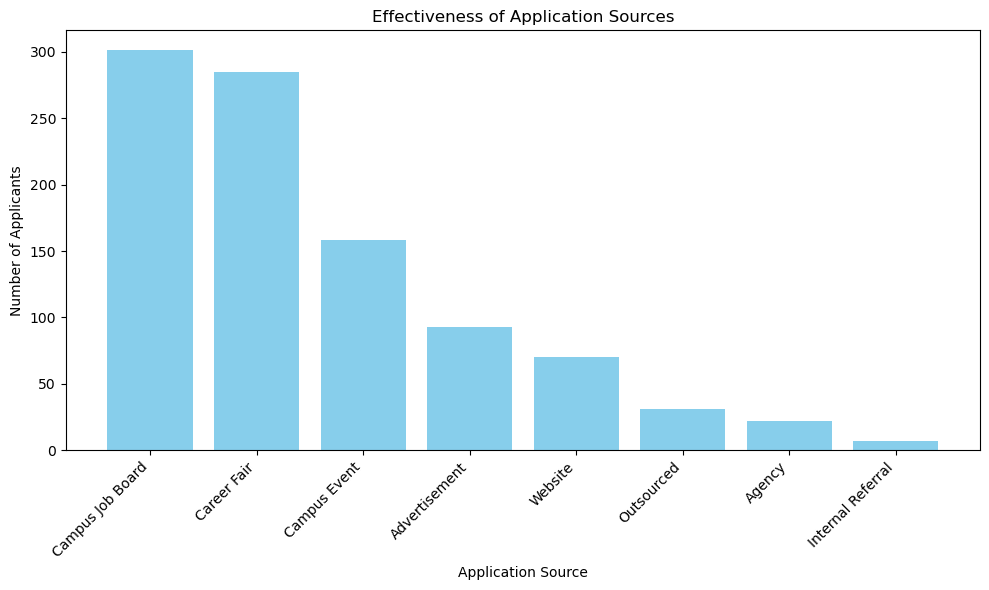

In [61]:
# Created the DataFrame
df = pd.DataFrame(app_sources)

# Sorted the DataFrame by Applicants in descending order for better visualization
df = df.sort_values(by='Applicants', ascending=False)

# Created the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Application Source'], df['Applicants'], color='skyblue')
plt.xlabel('Application Source')
plt.ylabel('Number of Applicants')
plt.title('Effectiveness of Application Sources')
plt.xticks(rotation=45, ha='right')  
# Rotate x-axis labels for better readability

# Save the plot as a PDF file
plt.tight_layout()
plt.savefig('application_sources_effectiveness.pdf')
plt.show()

## From the above graph we have conclude the most effective application is Campus job board in 1 st place and career fair is the second most effective application sources

## created another visualisation to find most effective application source that benefits candidates

In [62]:
# Created the DataFrame
app_sources = pd.DataFrame(app_sources)

# Initialize the Dash app
app = dash.Dash(__name__)

# Created options for department dropdown
department_options = [{'label': 'All Departments', 'value': 'All Departments'}] + [{'label': department, 'value': department} for department in app_sources['Department'].unique()]

# Created options for year dropdown
year_options = [{'label': 'All Years', 'value': 'All Years'}] + [{'label': str(year), 'value': year} for year in app_sources['Year'].unique()]

# Created options for stage dropdown
stage_options = [{'label': 'All Stages', 'value': 'All Stages'}] + [{'label': stage, 'value': stage} for stage in app_sources['Stage'].unique()]

# Created options for graph type dropdown
graph_type_options = [
    {'label': 'Bar', 'value': 'bar'},
    {'label': 'Pie', 'value': 'pie'},
    {'label': 'Area', 'value': 'area'},
    {'label': 'Box', 'value': 'box'},
    {'label': 'Violin', 'value': 'violin'},
]

# Defined the layout of the dashboard
app.layout = html.Div([
    html.Div([
        html.H1('Applications sources that is most effective', className='text-primary'),
    ], className='jumbotron'),
    
    # Add a markdown component for descriptions
    dcc.Markdown('''
    This dashboard visualizes the effectiveness of different Application Sources based on the number of applicants they brought in.
    ''', className='text-secondary'),

    html.Div([
        # created a new dropdown for department selection
        dcc.Dropdown(
            id='department-dropdown',
            options=department_options,
            value='All Departments'
        ),
        # created a new dropdown for year selection
        dcc.Dropdown(
            id='year-dropdown',
            options=year_options,
            value='All Years'
        ),
        # created a new dropdown for stage selection
        dcc.Dropdown(
            id='stage-dropdown',
            options=stage_options,
            value=[],
            multi=True,
            placeholder='Select Stages'
        ),
        # created a new dropdown for selecting the graph type
        dcc.Dropdown(
            id='graph-type-dropdown',
            options=graph_type_options,
            value='bar',
            placeholder='Select Graph Type'
        )
    ], style={'width': '50%', 'margin': 'auto'}),
    
    # created a new graph to show number of applicants based on selected year, department, stages, and graph type
    dcc.Graph(
        id='applicants-graph',
    ),
    
])

# Define the callback to update the graph based on dropdown selection
@app.callback(
    dash.dependencies.Output('applicants-graph', 'figure'),
    [dash.dependencies.Input('department-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value'),
     dash.dependencies.Input('stage-dropdown', 'value'),
     dash.dependencies.Input('graph-type-dropdown', 'value')]
)
def update_graph(selected_department, selected_year, selected_stages, graph_type):
    filtered_df = app_sources

    if selected_department != 'All Departments':
        filtered_df = filtered_df[filtered_df['Department'] == selected_department]

    if selected_year != 'All Years':
        filtered_df = filtered_df[filtered_df['Year'] == int(selected_year)]
    
    if selected_stages:
        filtered_df = filtered_df[filtered_df['Stage'].isin(selected_stages)]
    
    if graph_type == 'bar':
        fig = px.bar(filtered_df, x='Application Source', y='Applicants', color='Application Source', title='Number of Applicants by Application Source')
        for idx, val in enumerate(filtered_df.groupby('Application Source')['Applicants'].sum()):
            fig.add_annotation(x=idx, y=val, text=f'Total:{val}', showarrow=False)
        fig.update_traces(texttemplate='', textposition='outside')
    elif graph_type == 'pie':
        fig = px.pie(filtered_df, names='Application Source', values='Applicants', title='Distribution of Applicants by Application Source')
    elif graph_type == 'area':
        fig = px.area(filtered_df, x='Application Source', y='Applicants', color='Application Source', title='Number of Applicants by Application Source')
    elif graph_type == 'box':
        fig = px.box(filtered_df, x='Application Source', y='Applicants', color='Application Source', title='Number of Applicants by Application Source')
    elif graph_type == 'violin':
        fig = px.violin(filtered_df, x='Application Source', y='Applicants', color='Application Source', title='Number of Applicants by Application Source')
    
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        font_color='black'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8051)

## From the above graph we can conclude the most effective job board is campus job board and  conclude that most number of offer was received by campus event applicants in all three different. please feel free to check the drop downs of the graph

In [63]:
df = pd.DataFrame(High_degree_df)
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Number of Candidates with Different Highest Degrees applied to each position based on the experience', className='text-primary'),
    
    # Add a dropdown for years of experience selection
    dcc.Dropdown(
        id='years-of-experience-dropdown',
        options=[{'label': f'{years} Years', 'value': years} for years in df['Years of Experience'].unique()],
        value=df['Years of Experience'].max(),  # Set the default value to the maximum years of experience
        placeholder='Select Years of Experience'
    ),
    
    # Add a bar chart to show the count of candidates with different highest degrees based on years of experience for each position
    dcc.Graph(
        id='highest-degree-bar-chart',
    ),
    
])

# Define the callback to update the bar chart based on dropdown selection
@app.callback(
    dash.dependencies.Output('highest-degree-bar-chart', 'figure'),
    [dash.dependencies.Input('years-of-experience-dropdown', 'value')]
)
def update_bar_chart(selected_experience):
    filtered_df = df[df['Years of Experience'] == selected_experience]

    counts_df = filtered_df.groupby(['Position Title', 'Highest Degree'])['Candidate ID Number'].count().reset_index(name='Applicants')

    fig = px.bar(counts_df, x='Position Title', y='Applicants', title=f'Number of Candidates with {selected_experience} Years of Experience',
                 color='Highest Degree', barmode='group')
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        font_color='black'
    )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8052)

## The candidates with highest degree of PHD applied to the role of Sr.software engineer and with bachelors is sr. customer services operations associates. please feel free to play with the graph

# ------------------------------------------ THE END ----------------------------------------------------